
#INTERN : PARCHAM GUPTA

#DATA SCIENCE AND BUSINESS ANALYTICS Intern at the Sparks Foundation

#TASK 2: Prediction Using Unsupervised ML

##Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


##Reading the dataset

In [ ]:
df = pd.read_csv("Iris.csv")

##Having a view at top 5 rows of the dataset

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##Exploring the dimensions of the dataset

In [ ]:
df.shape

(150, 6)

##Statistical Analysis of the dataset

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##Taking appropriate columns as independent variables

In [ ]:
X = df.drop(['Id', 'Species'], axis = 1)

##Checking the first 5 rows of the independent variable dataframe X

In [ ]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##Using the elbow method to choose the appropriate value for k in kmeans clustering model

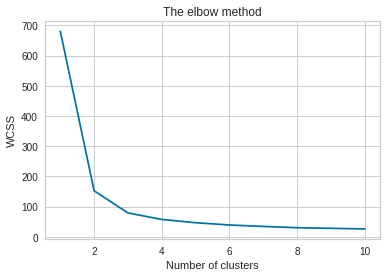

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

##The elbow method shows that the appropriate value of k is 3
##Now defining the kmeans clustering model with k = 3, and other suitable parameters

In [ ]:
#k = 3
model = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)

##Fitting the model on the data

In [ ]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

##Predicting clusters 

In [ ]:
y_pred = model.predict(X)

##Checking the cluster values assigned to the dataset

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

##Plotting the data points along with the clusters and cluster centres assigned to them by the model
###Since, the plots can only show 2D data, therefore, multiple plots are plotted to visualize the clustering based on different combination of the 4 given features taken 2 at a time

###Plot between SepalLengthCm and	SepalWidthCm	

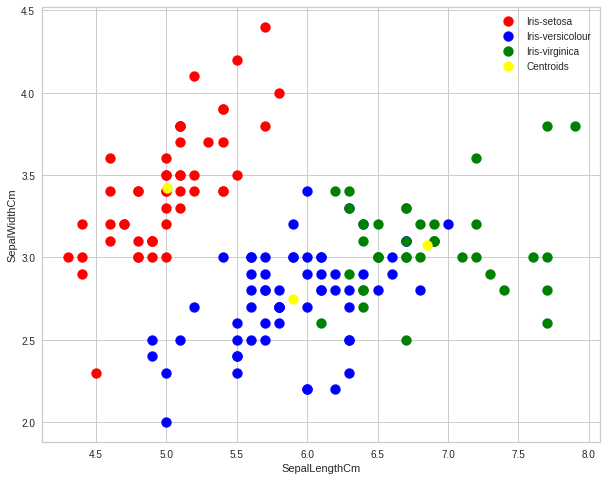

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X['SepalLengthCm'][y_pred == 0], X['SepalWidthCm'][y_pred == 0], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X['SepalLengthCm'][y_pred == 1], X['SepalWidthCm'][y_pred == 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X['SepalLengthCm'][y_pred == 2], X['SepalWidthCm'][y_pred == 2],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")

plt.legend()

###PLot between SepalLengthCm	and PetalLengthCm

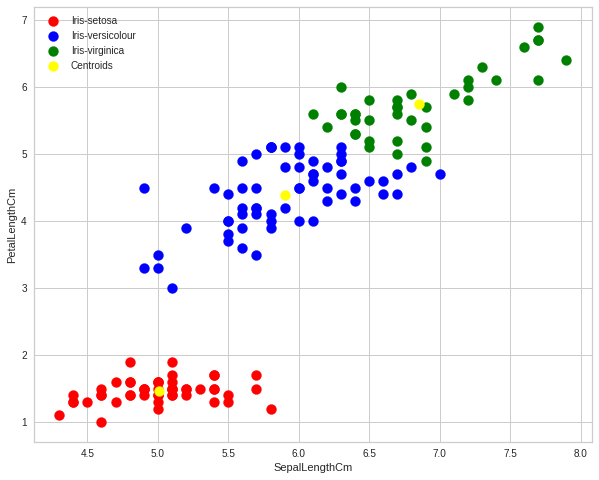

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X['SepalLengthCm'][y_pred == 0], X['PetalLengthCm'][y_pred == 0], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X['SepalLengthCm'][y_pred == 1], X['PetalLengthCm'][y_pred == 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X['SepalLengthCm'][y_pred == 2], X['PetalLengthCm'][y_pred == 2],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,2], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")

plt.legend()

###Plot between SepalLengthCm and PetalWidthCm 

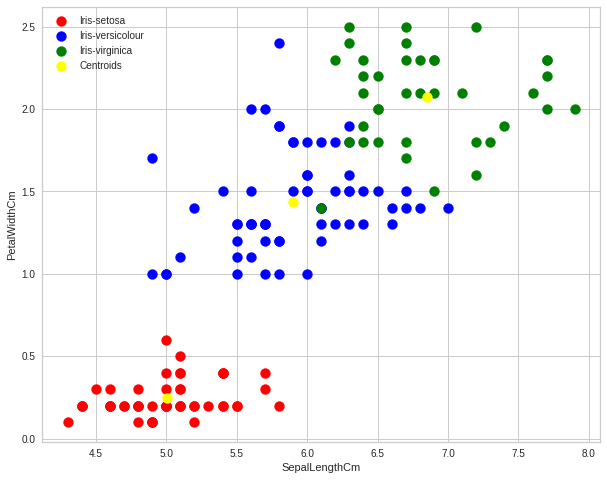

In [ ]:
plt.figure(figsize=(10,8))

plt.scatter(X['SepalLengthCm'][y_pred == 0], X['PetalWidthCm'][y_pred == 0], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X['SepalLengthCm'][y_pred == 1], X['PetalWidthCm'][y_pred == 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X['SepalLengthCm'][y_pred == 2], X['PetalWidthCm'][y_pred == 2],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalWidthCm")

plt.legend()

###Plot between SepalWidthCm and PetalLengthCm	

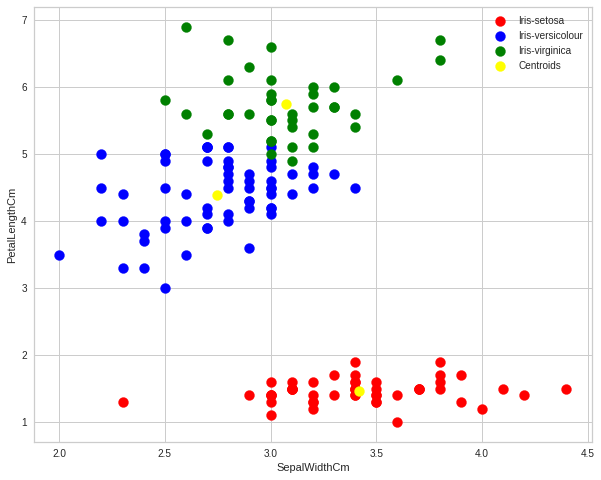

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X['SepalWidthCm'][y_pred == 0], X['PetalLengthCm'][y_pred == 0], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X['SepalWidthCm'][y_pred == 1], X['PetalLengthCm'][y_pred == 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X['SepalWidthCm'][y_pred == 2], X['PetalLengthCm'][y_pred == 2],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(model.cluster_centers_[:, 1], model.cluster_centers_[:,2], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("SepalWidthCm")
plt.ylabel("PetalLengthCm")

plt.legend()

###PLot between SepalWidthCm and PetalWidthCm

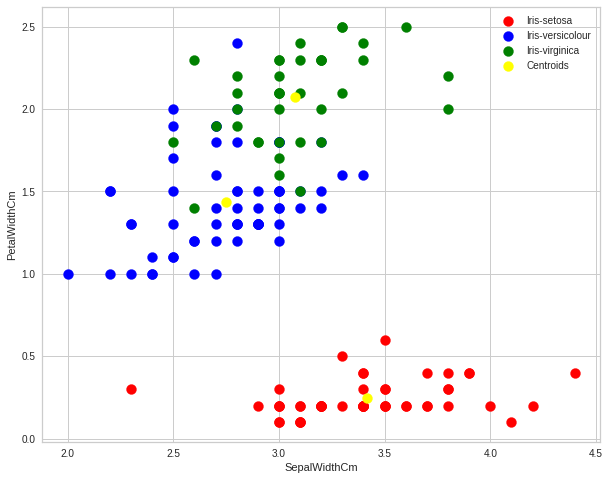

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X['SepalWidthCm'][y_pred == 0], X['PetalWidthCm'][y_pred == 0], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X['SepalWidthCm'][y_pred == 1], X['PetalWidthCm'][y_pred == 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X['SepalWidthCm'][y_pred == 2], X['PetalWidthCm'][y_pred == 2],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(model.cluster_centers_[:, 1], model.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("SepalWidthCm")
plt.ylabel("PetalWidthCm")

plt.legend()

###Plot between PetalLengthCm and PetalWidthCm

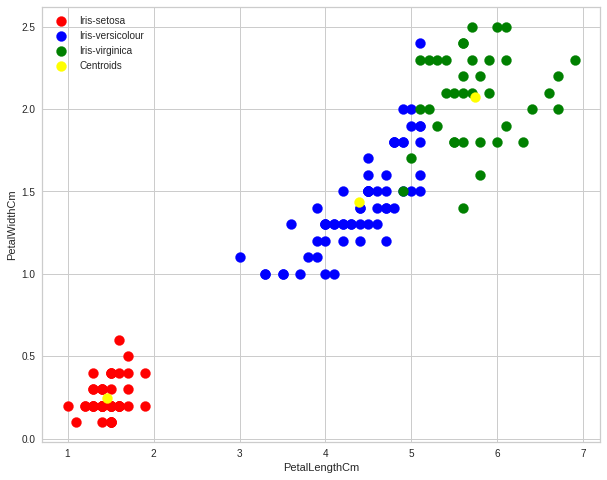

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X['PetalLengthCm'][y_pred == 0], X['PetalWidthCm'][y_pred == 0], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X['PetalLengthCm'][y_pred == 1], X['PetalWidthCm'][y_pred == 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X['PetalLengthCm'][y_pred == 2], X['PetalWidthCm'][y_pred == 2],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")

plt.legend()